In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv("insurance.csv") 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df["count"]=1

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'count'],
      dtype='object')

In [6]:
#Not sure if I should seperate dicrete and continous count, does age need normalising???
count = ['age', 'bmi', 'children', 'charges']
categorical = ['sex', 'smoker', 'region']

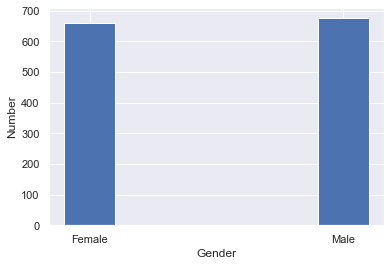

In [7]:
plt.bar(["Female","Male"],[len(df[df["sex"]=="female"]),len(df[df["sex"]=="male"])],width=0.2)
plt.xlabel("Gender")
plt.ylabel("Number")

plt.show()

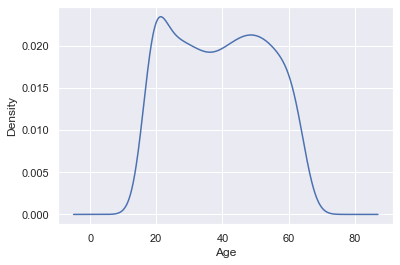

In [8]:
df["age"].plot.density()

plt.xlabel("Age")
plt.show()

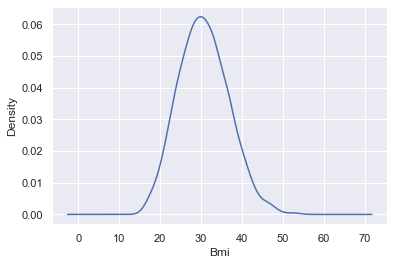

In [9]:
df["bmi"].plot.density()

plt.xlabel("Bmi")
plt.show()

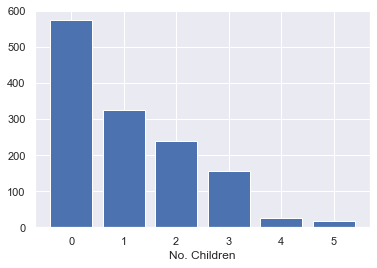

In [10]:
plt.bar(x=list(map(str, set(df["children"]))),height=df["children"].value_counts()) #.plot.density()

plt.xlabel("No. Children")

plt.show()

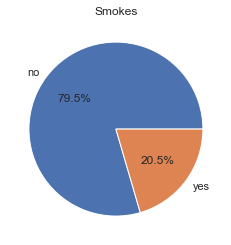

In [11]:
plt.pie(df["smoker"].value_counts(),labels = ["no","yes"], autopct='%1.1f%%')

plt.title("Smokes")
plt.show()

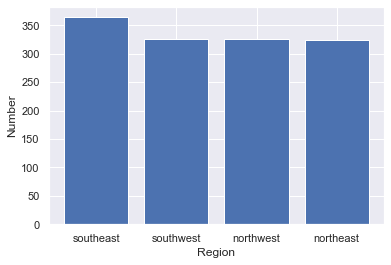

In [12]:
plt.bar(["southeast","southwest","northwest","northeast"],df["region"].value_counts())
plt.xlabel("Region")
plt.ylabel("Number")

plt.show()

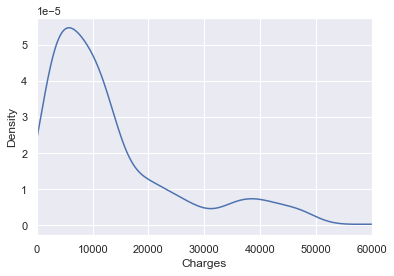

In [13]:
df["charges"].plot.density()

plt.xlabel("Charges")
plt.xlim(0,60000)
plt.show()

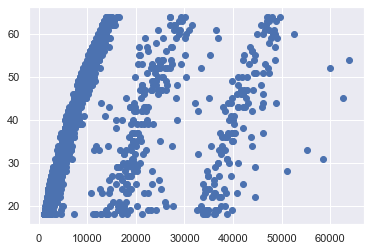

There seems to be 3 significantly spaced apart bands, or clusters that show up when seperating by age. For each cluster
The charge seems to be higher by age.


In [14]:
plt.scatter(df["charges"],df["age"])

plt.show()
print("""There seems to be 3 significantly spaced apart bands, or clusters that show up when seperating by age. For each cluster
The charge seems to be higher by age.""")

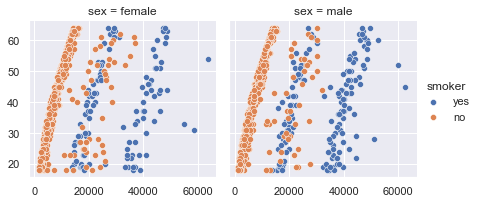

In [59]:
g = sns.FacetGrid(df, col="sex", hue="smoker") #Graph looks wrong, colours look switched
g.map_dataframe(sns.scatterplot, x="charges", y="age")
g.add_legend()

plt.show()

We see that several of these variables are discrete categorical variables, and are strings. A machine learning alghroithm
can't understand string variables, so we will have to use a technique called one hot encoding to convert the feature into
several binary features

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#The make_column_transformer is to choose specific columns to encode, rather than the whole dataset at once

transformer = make_column_transformer(
    (OneHotEncoder(), categorical),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_no,onehotencoder__x1_yes,onehotencoder__x2_northeast,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges,count
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520,1.0


In [17]:
#Normalising
print(f"""Another issue we see is that the count variables have differing magnitudes, for example children has a mean of {round(df["children"].mean(),1)} while bmi 
has a mean of {round(df["bmi"].mean(),1)}. A machine learning algorithm will?? give higher importance to features with larger values (ref),
so to counter this we will have to standardise the count features""".format())

print("""
I'll use the standard scaler for this, which uses the equation scaled_x=(x-mean)/standard_deviation. This keeps the 
distribution of the variables, but centre's them at 0, and scales them down. (ref for this, and for why standard is best)
""")

Another issue we see is that the count variables have differing magnitudes, for example children has a mean of 1.1 while bmi 
has a mean of 30.7. A machine learning algorithm will?? give higher importance to features with larger values (ref),
so to counter this we will have to standardise the count features

I'll use the standard scaler for this, which uses the equation scaled_x=(x-mean)/standard_deviation. This keeps the 
distribution of the variables, but centre's them at 0, and scales them down. (ref for this, and for why standard is best)



In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

transformed_df[count] = scaler.fit_transform(transformed_df[count])
transformed_df.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_no,onehotencoder__x1_yes,onehotencoder__x2_northeast,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges,count
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.438764,-0.453320,-0.908614,0.298584,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.509965,0.509621,-0.078767,-0.953689,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.797954,0.383307,1.580926,-0.728675,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.441948,-1.305531,-0.908614,0.719843,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.513149,-0.292556,-0.908614,-0.776802,1.0


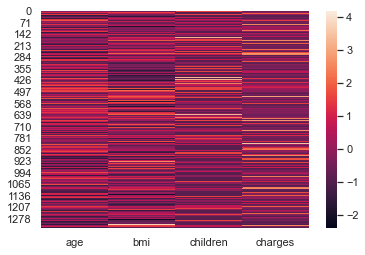

In [19]:
sns.heatmap(transformed_df[count])
plt.show()

In [20]:
cluster_cols=["age","charges"]

First, we use KMeans, as it is the simplest and fastest (ref) clustering algorithm
We see that as the data isn't in grouped in 'clusters', the algorithm doesn't preform well at seperating between them.


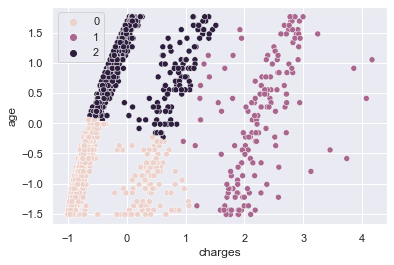

In [21]:
print("First, we use KMeans, as it is the simplest and fastest (ref) clustering algorithm")
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

labels = model.fit_predict(transformed_df[cluster_cols])
#df["APlabels"] = labels
sns.scatterplot(x= transformed_df["charges"], y = transformed_df["age"], hue=labels)
print("We see that as the data isn't in grouped in 'clusters', the algorithm doesn't preform well at seperating between them.")

0.5,5


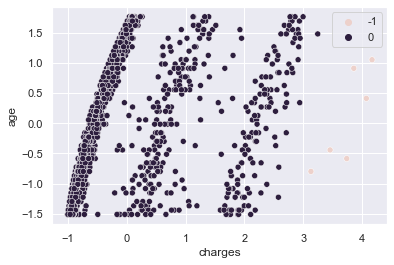

1.0,5


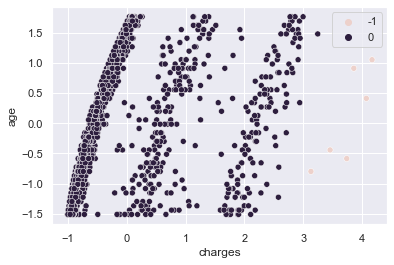

1.5,5


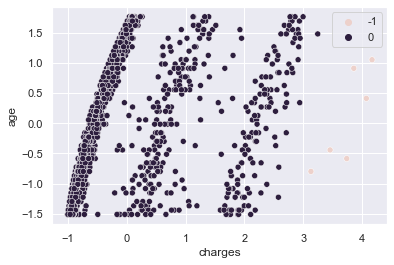

2.0,5


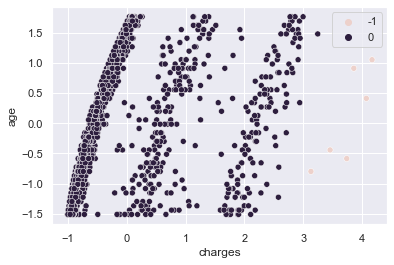

2.5,5


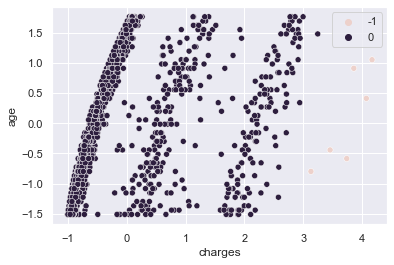

0.5,16


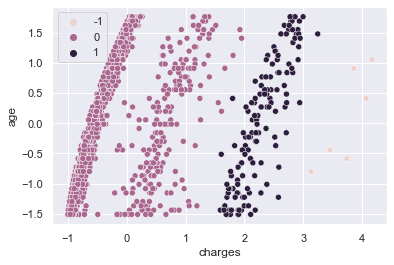

1.0,16


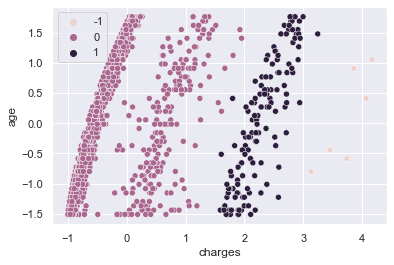

1.5,16


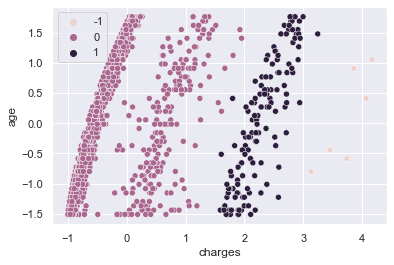

2.0,16


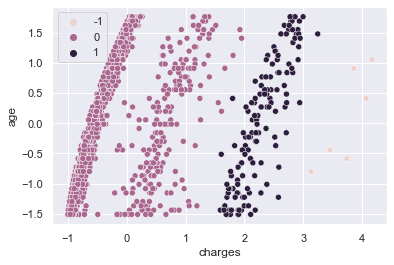

2.5,16


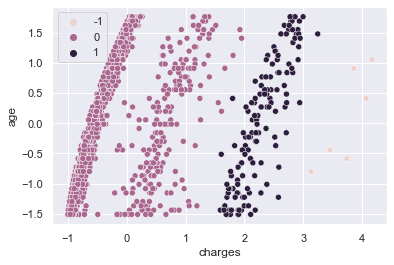

0.5,27


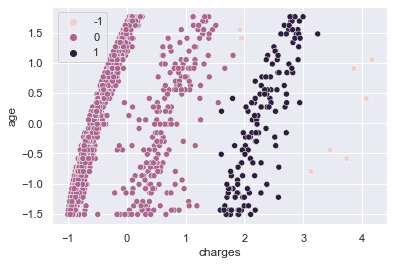

1.0,27


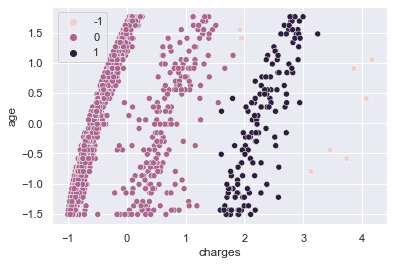

1.5,27


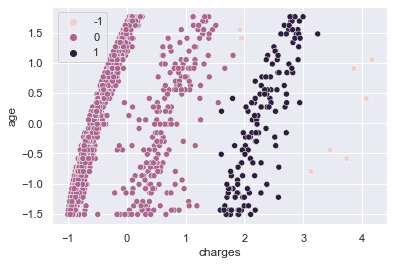

2.0,27


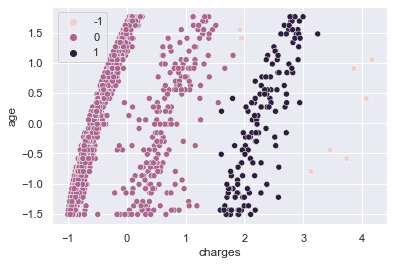

2.5,27


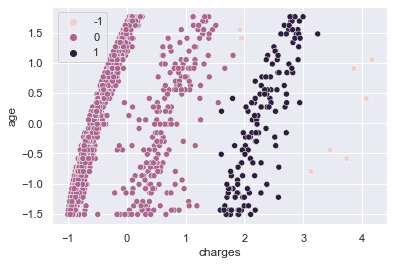

0.5,38


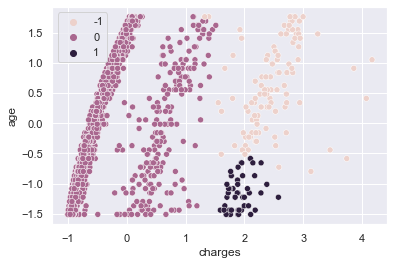

1.0,38


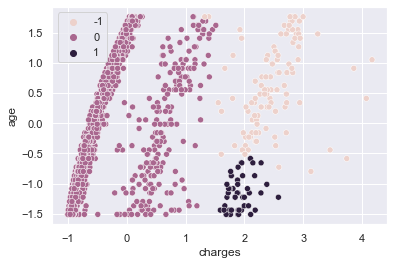

1.5,38


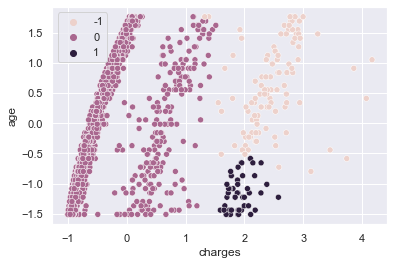

2.0,38


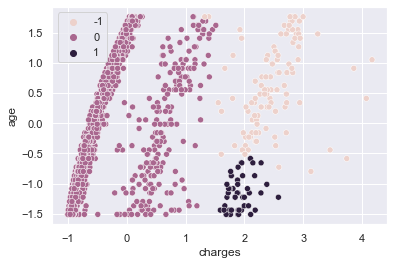

2.5,38


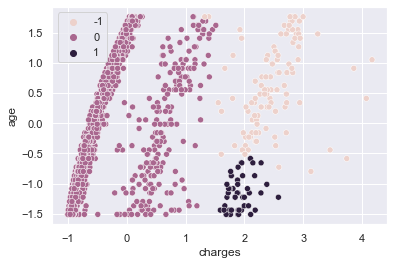

0.5,50


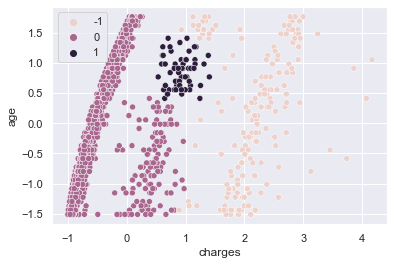

1.0,50


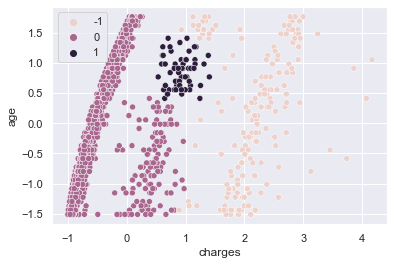

1.5,50


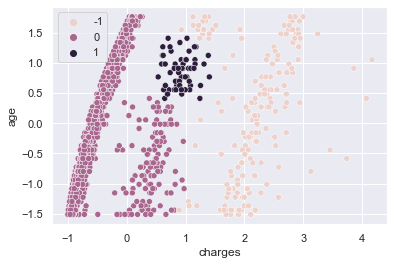

2.0,50


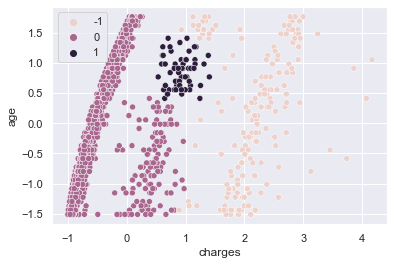

2.5,50


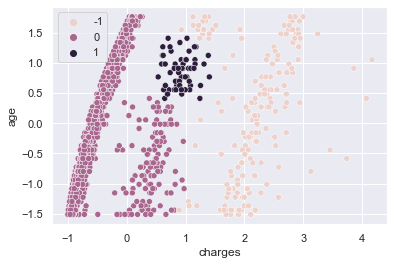

As DBSCAN is a density based algorithm, the model doesn't preform well as the the 'band' on the left has a huge amount 
of points, so it has a high density, while the two on the right are much more spread out 


In [22]:
from sklearn.cluster import DBSCAN 

#Testing different params to see if any preform well
for i1 in np.linspace(5,50,5):
    for i2 in np.linspace(0.5,2.5,5):
        model = DBSCAN(min_samples=int(i1)) 
        labels = model.fit_predict(transformed_df[cluster_cols])
        sns.scatterplot(x= transformed_df["charges"], y = transformed_df["age"], hue=labels)
        print(f"{i2},{int(i1)}".format())
        plt.show()
print("""As DBSCAN is a density based algorithm, the model doesn't preform well as the the 'band' on the left has a huge amount 
of points, so it has a high density, while the two on the right are much more spread out """)

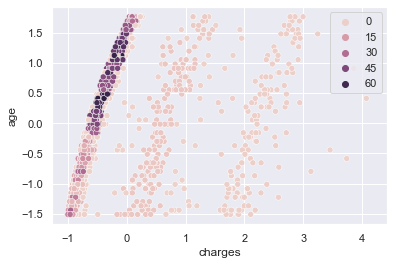

5


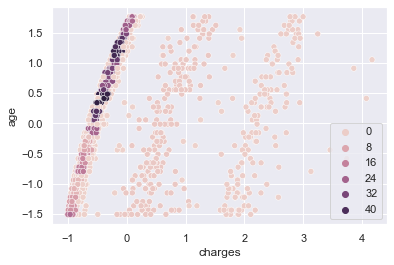

9


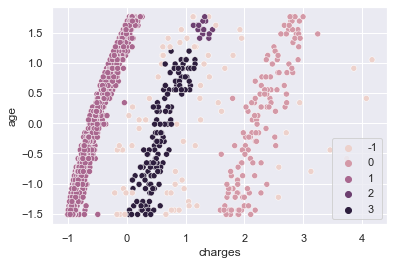

14


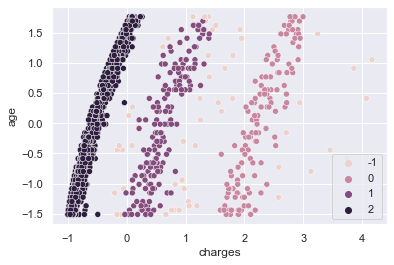

18


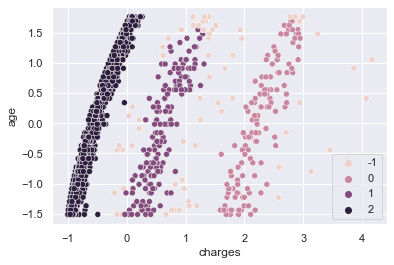

23


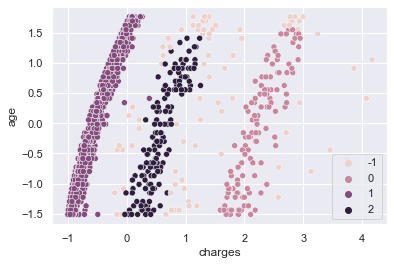

27


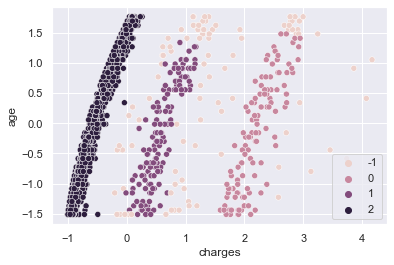

32


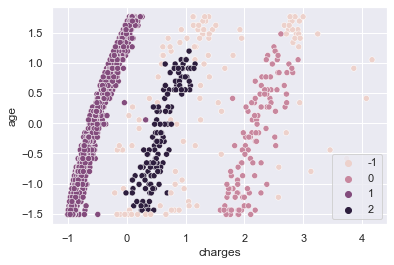

36


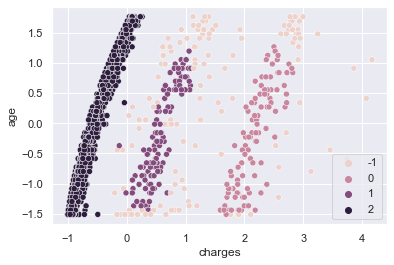

41


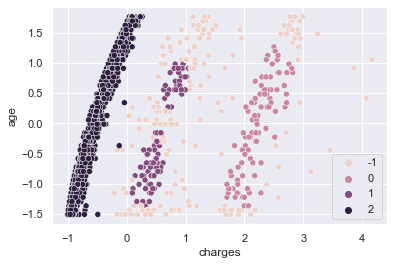

45


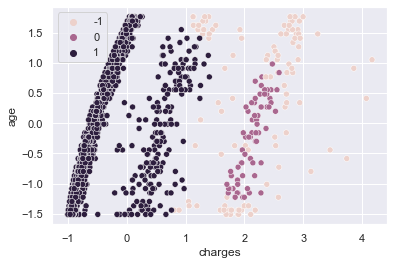

50
We see that this works much better, and a (mcs) of around 20 yeilds the best results


In [23]:
import hdbscan #hdbscan was made to solve the problems dbscan had with bias towards differing density clusters

for i in np.linspace(5,50,11):
    model = hdbscan.HDBSCAN(min_cluster_size=int(i)) #(eps=?, min_samples=?) need to check params

    labels = model.fit_predict(transformed_df[cluster_cols])
    sns.scatterplot(x= transformed_df["charges"], y = transformed_df["age"], hue=labels)
    plt.show()
    print(int(i))
print("We see that this works much better, and a (mcs) of around 20 yeilds the best results")

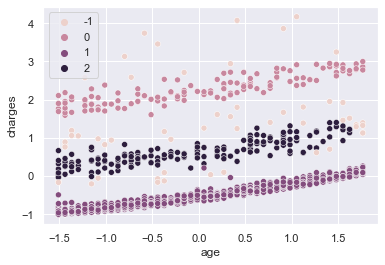

50


In [24]:
model = hdbscan.HDBSCAN(min_cluster_size=20) #(eps=?, min_samples=?) need to check params
labels = model.fit_predict(transformed_df[cluster_cols])
sns.scatterplot(y= transformed_df["charges"], x = transformed_df["age"], hue=labels)
plt.show()
print(int(i))

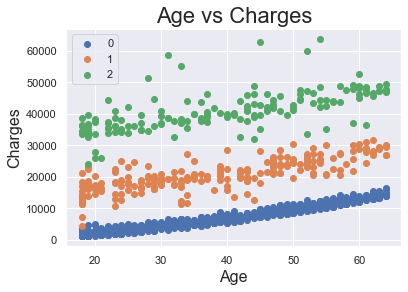

<Figure size 144x144 with 0 Axes>

In [35]:
from sklearn.mixture import GaussianMixture


age_charges = df[['age', 'charges']] #Looks to be performing much better without normalising??

gmm = GaussianMixture(n_components = 3,random_state=1)
gmm.fit(age_charges)

#predictions from gmm
labels = gmm.predict(age_charges)
frame = pd.DataFrame(age_charges)
frame['cluster'] = labels
frame.columns = ['age', 'charges', 'cluster']

for k in range(0,3):
    age_charges = frame[frame["cluster"]==k]
    plt.scatter(age_charges["age"],age_charges["charges"],label=str(k))
plt.legend()
plt.title('Age vs Charges', fontdict={'fontsize':22})
plt.xlabel('Age', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.figure(figsize=(2, 2))

plt.show()

In [48]:
mapping = {0:"A",1:"B",2:"C"}
bands=[mapping[k] for k in labels]
bandlist=["A","B","C"]

In [37]:
df["band"]=bands

In [38]:
for x in sorted(set(df["band"])):
    print(f"Band {x}:".format())
    print(df[df["band"]==x].describe())

Band A:
              age         bmi    children       charges  count
count  964.000000  964.000000  964.000000    964.000000  964.0
mean    39.431535   30.604839    1.073651   7050.358117    1.0
std     14.037351    6.114012    1.214216   3871.675561    0.0
min     18.000000   15.960000    0.000000   1121.873900    1.0
25%     27.000000   26.220000    0.000000   3596.739712    1.0
50%     40.000000   30.300000    1.000000   6698.311600    1.0
75%     51.000000   34.400000    2.000000  10217.548050    1.0
max     64.000000   53.130000    5.000000  16455.707850    1.0
Band B:
              age         bmi    children       charges  count
count  215.000000  215.000000  215.000000    215.000000  215.0
mean    38.311628   27.765512    1.158140  20769.958849    1.0
std     13.896500    5.097235    1.227838   4894.006181    0.0
min     18.000000   17.195000    0.000000   4561.188500    1.0
25%     26.500000   24.410000    0.000000  17593.309630    1.0
50%     38.000000   27.360000    1.0000

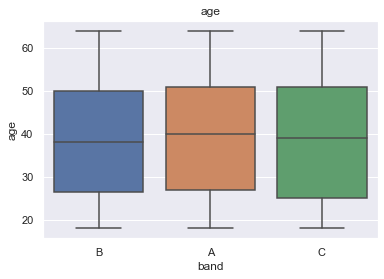

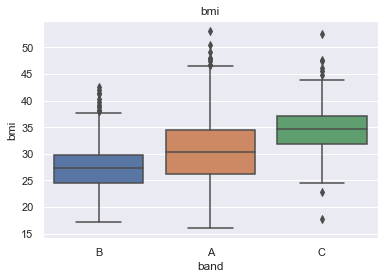

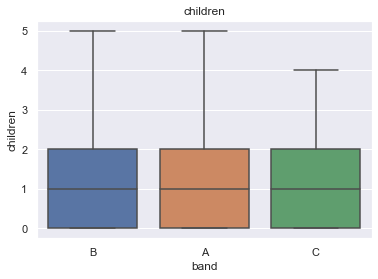

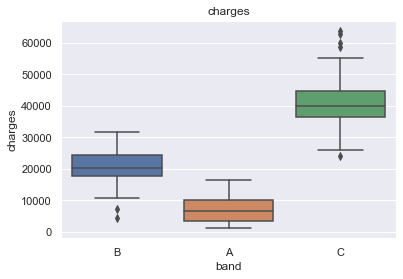

In [39]:
for col in count:
    sns.boxplot(x="band", y= col, data=df)
    plt.title(col)
    plt.show()

In [40]:
print("""Count variables:
Ages are similar, mean and std.
BMI is interesting, C has significantly higher BMI (expected) while B is noticeably lower than A
Children similar, ((probably irrelevant))
""")

Count variables:
Ages are similar, mean and std.
BMI is interesting, C has significantly higher BMI (expected) while B is noticeably lower than A
Children similar, ((probably irrelevant))



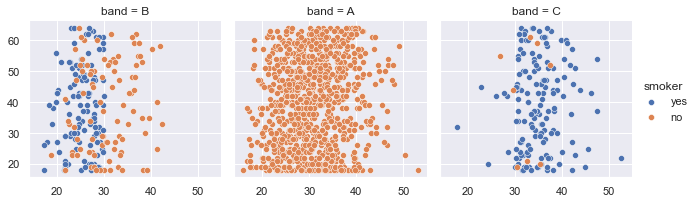

In [58]:
g = sns.FacetGrid(df, col="band", hue="smoker")
g.map_dataframe(sns.scatterplot, x="bmi", y="age")
g.add_legend()
plt.show()

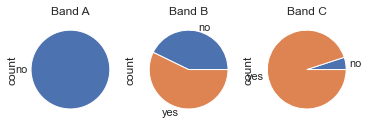

Not smoking makes you much more likely to be in a higher band


In [56]:
for i in range(3):
    x=bandlist[i]
    plt.subplot(1, 3, i+1)
    df[df["band"]==x].groupby("smoker")["count"].sum().plot.pie()
    plt.title("Band " +x)
plt.show()
print("Not smoking makes you much more likely to be in a higher band")

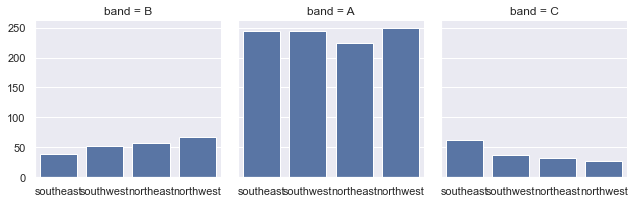

Nothing massive stands out, B is more North while C is more South, but not by a large amount


In [44]:
g = sns.FacetGrid(df, col="band")
g.map_dataframe(sns.countplot, x="region")

plt.show()
print("Nothing massive stands out, B is more North while C is more South, but not by a large amount")

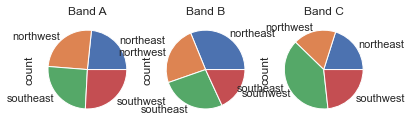

<Figure size 1080x720 with 0 Axes>

In [64]:
for i in range(3):
    x=bandlist[i]
    plt.subplot(1, 3, i+1)
    df[df["band"]==x].groupby("region")["count"].sum().plot.pie()
    plt.title("Band " +x)
plt.figure(figsize=(15,10))
plt.show()

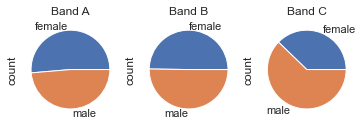

In [55]:
for i in range(3):
    x=bandlist[i]
    plt.subplot(1, 3, i+1)
    df[df["band"]==x].groupby("sex")["count"].sum().plot.pie()
    plt.title("Band " +x)
plt.show()

# Count
count variable analysis

In [65]:
count

['age', 'bmi', 'children', 'charges']

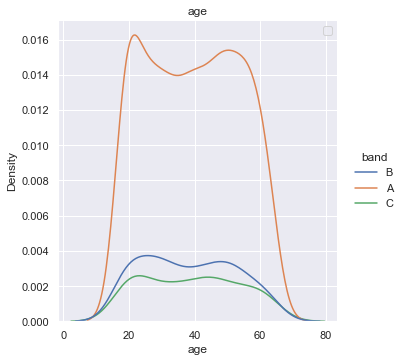

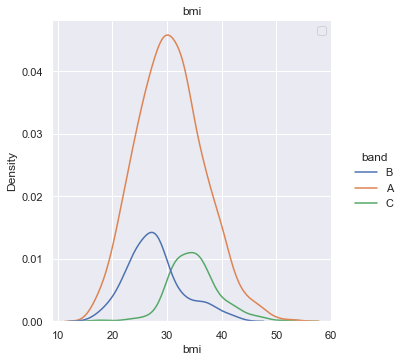

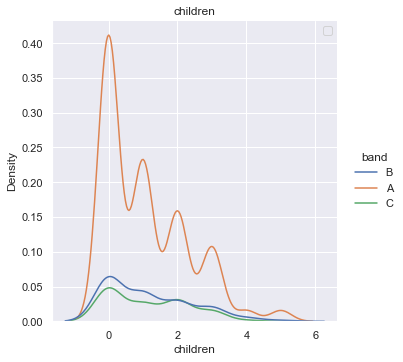

In [73]:
for i in range(3):
    #plt.subplot(1, 3, i+1)
    sns.displot(df, x=count[i], hue="band", kind="kde")
    plt.title(count[i])
    plt.legend(())
    plt.show()

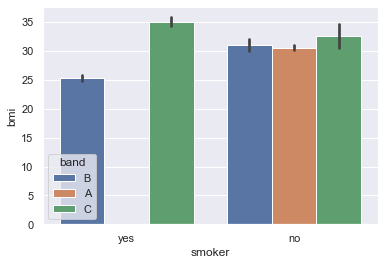

In [76]:
sns.barplot(data=df, x="smoker",y="bmi",hue="band")
plt.show()
print("""
This makes more sense, it shows that the average BMI is higher in band B than A when looking at non smokers, and it is probably
the smoking that takes poepole into band B if lower BMI, and if high BMI+smoking then band C.

Still interesting that the BMI for band B is so low (maybe because of age??).

Shows that BMI and smoking are probably most significant determiners (find out if true)
      """)

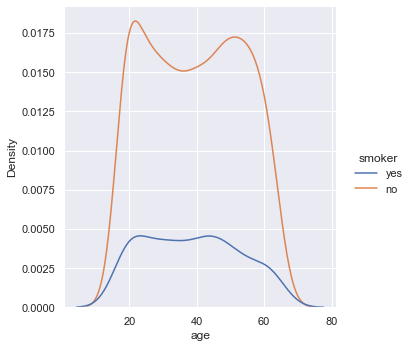

In [80]:
sns.displot(data = df,x="age",hue="smoker", kind="kde")
plt.show()
print("Smoking doesn't seem to change too much with age, slightly less for older but not massively")

In [87]:
scaled_train = transformed_df.drop(["charges"],axis=1)

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_train, labels) #Lables from GMM
importances = pd.DataFrame(data={
    'Attribute': scaled_train.columns,
    'Importance': abs(model.coef_[0]),
    'Positive' : model.coef_[0]>=0
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

In [99]:
print(importances)
print("since the features are scaled, we can use the coefficient to see how significant all features are.")

                      Attribute  Importance  Positive
2          onehotencoder__x1_no    2.758618      True
3         onehotencoder__x1_yes    2.757531     False
9                           bmi    0.598217     False
4   onehotencoder__x2_northeast    0.222024     False
7   onehotencoder__x2_southwest    0.159069      True
10                     children    0.104026     False
5   onehotencoder__x2_northwest    0.048638      True
1        onehotencoder__x0_male    0.024245      True
0      onehotencoder__x0_female    0.023158     False
8                           age    0.021578      True
6   onehotencoder__x2_southeast    0.015404      True
11                        count    0.001087      True


In [84]:
print("""
It seems that those are correct, smoking (onehotencoder__x1_no and onehotencoder__x1_yes) are the most important, by a large 
amount, followed by bmi. 
""")

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)